In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


# Overview

The detailed explanation of this project can be found 'here', the full story telling of the project without the code part, understanding the `Corporación Favorita`, unit sales performance across the various stores in 'Ecuadorian', along with the information on the predicts values of the sales what steps does the company need to take for better customer satisfaction through the insights gathered from this notebook. 

# Data Importing

First, lets import all the CSV files into the notebook

In [3]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
df_holidays_events = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
df_transctions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
df_stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
df_test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')


As we have imported all the files for analysis, now let's look for any missing values does the data sets contain.

Let's start with the train data first

In [4]:
#to find the number of rows
df_train.shape

(3000888, 6)

Therefore, in total we have 3000888 rows and 6 columns, it's a quite good amount of data for good predictions.

In [5]:
#look for the missing values
missing_values_train = df_train.isnull().sum()
missing_values_train

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Great, our train data is pretty clean, we don't have any null values!! let's cross check it once, let's print the first few rows to have a look of our train data table.

In [6]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
df_train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [8]:
## Nice, now let's analyze the remaining file

df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
df_oil.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# Exploratory Data Analysis (EDA)

We need to understad the behaviour of the data and it's impact on the target, that is sales column. In our train data we got 3 main important columns that we need to focus on first that refelct the sales. Therefore, let's dig and find the insightson how these columns are affecting the data. 

In [11]:
# to find number of unique values in the 'family' column in train dataset
unique_values_familiy = df_train['family'].unique()
unique_values_familiy

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [12]:
no_of_unique_values = df_train['family'].nunique()
no_of_unique_values

33

In [13]:
df_train['family'].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [14]:
"""
Now analyze the no of stores we have,
Values from the 'store_nbr' column from train data set represents the store number, 
each store has unique number that can be accesed through store data

"""
unique_values_store = df_train['store_nbr'].unique()
unique_values_store

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [15]:
no_of_stores = df_train['store_nbr'].nunique()
no_of_stores

54

Therefore we can say that the company have 54 stores in total, each store having 33 product family types. Now, it's time to analyze how each store, family type, and on which day affecting the sales. To do so, let's use visual graphs using libraries such as matplotlib, seaborn, and plotly. 

## Data Visualization for train data set

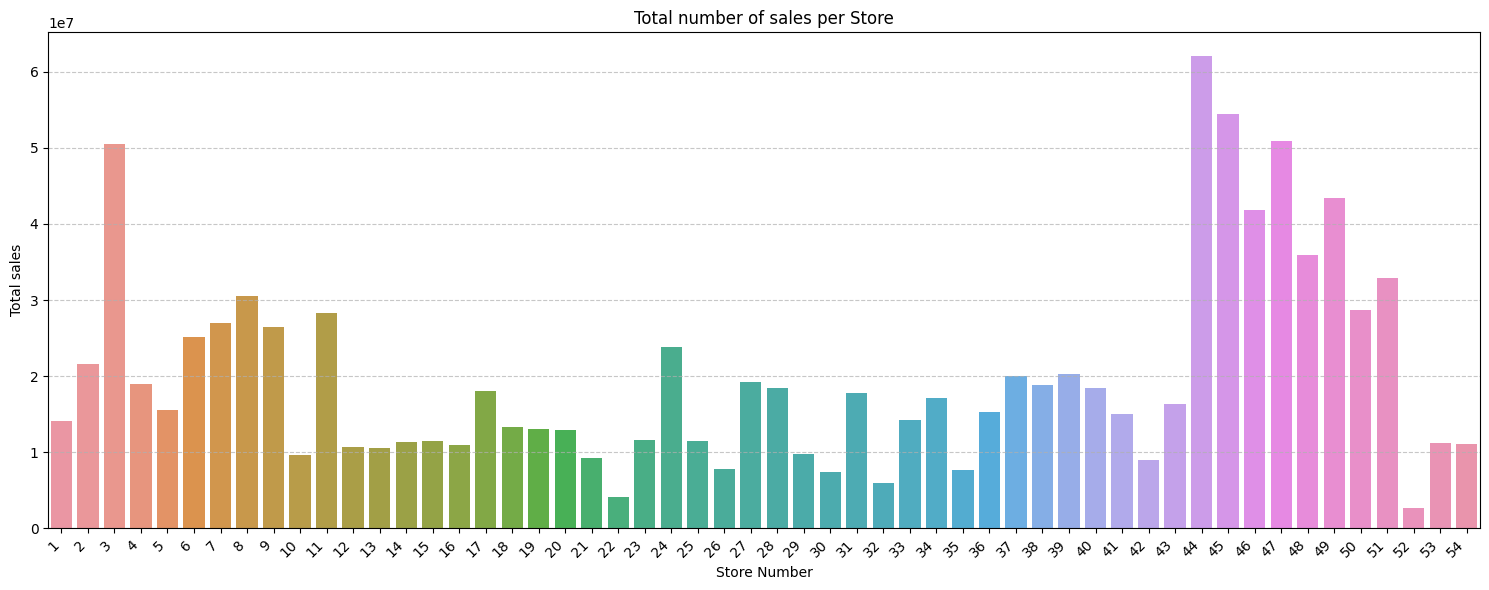

In [16]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

""" Trend between no of stores and sales,
first we will groub stores by `store_nbr` and then visualize the 
total or average sales per store. Bar plot and box plot, bar plot shows the total/average 
for each store and a box plot shows the distribution of daily sales for each store."""

#aggriate total sales per store
store_sales = df_train.groupby('store_nbr')['sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (15,6))
sns.barplot(x = store_sales.index, y = store_sales.values)
plt.title('Total number of sales per Store')
plt.xlabel('Store Number')
plt.ylabel('Total sales')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

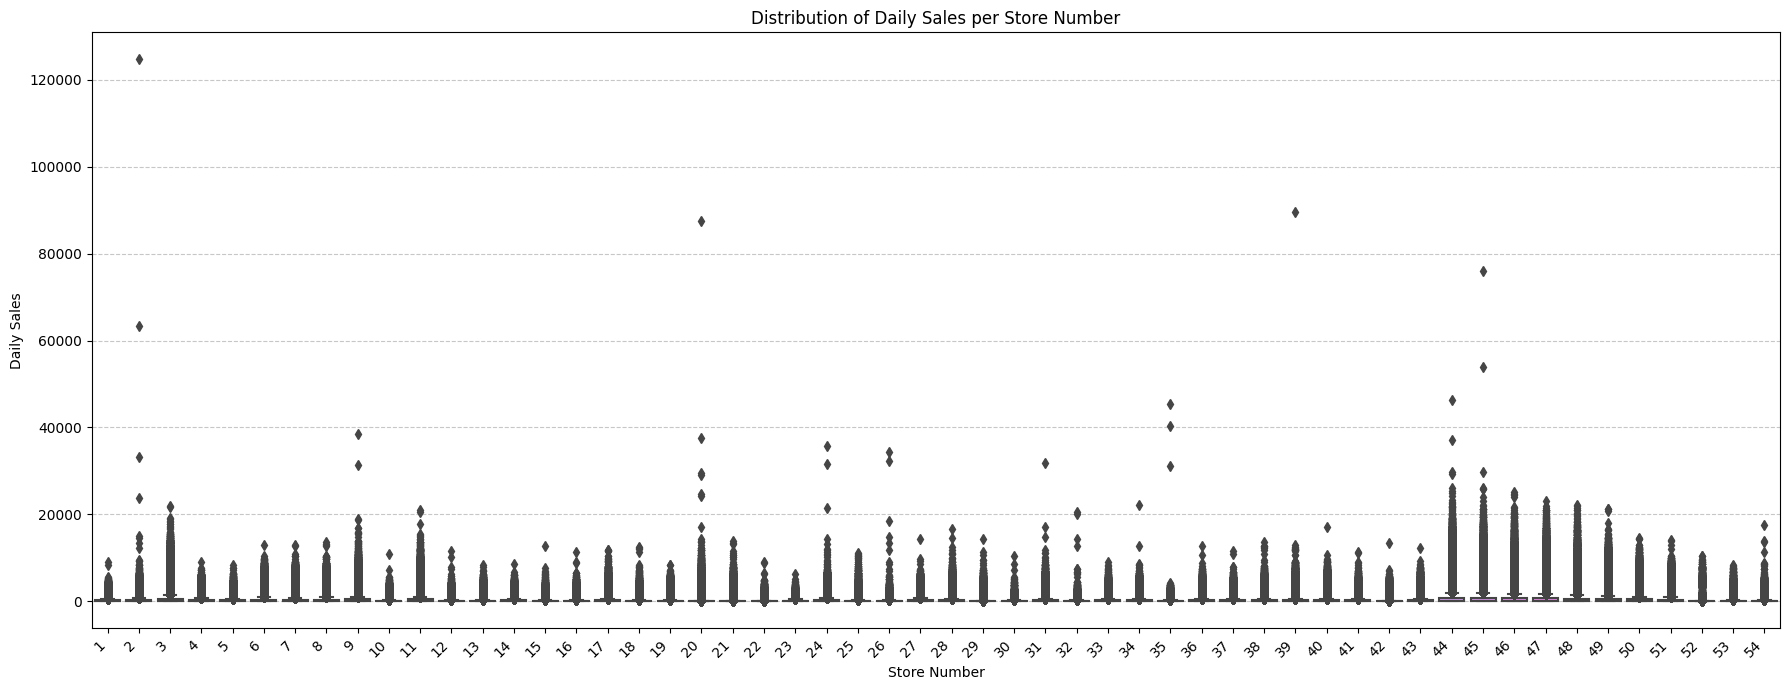

In [17]:
#a box plot to see distribution of daily sales per store
plt.figure(figsize=(18, 7))
sns.boxplot(x = 'store_nbr', y = 'sales', data = df_train)
plt.title('Distribution of Daily Sales per Store Number')
plt.xlabel('Store Number')
plt.ylabel('Daily Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

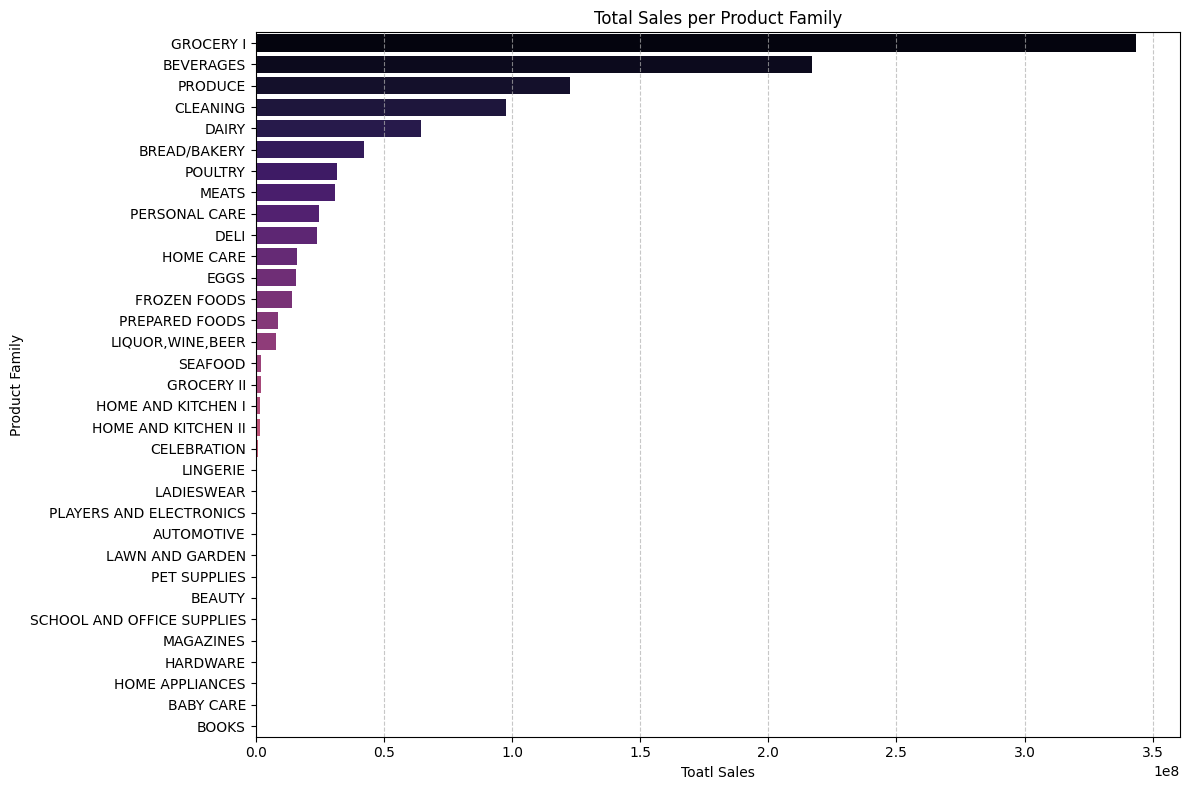

In [18]:
# Plot between family type and sales
#aggrigate total sales per family type first and then plot the graph
family_sales = df_train.groupby('family')['sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (12,8))
sns.barplot(x= family_sales.values, y = family_sales.index, palette = 'magma')
plt.title('Total Sales per Product Family')
plt.xlabel('Toatl Sales')
plt.ylabel('Product Family')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

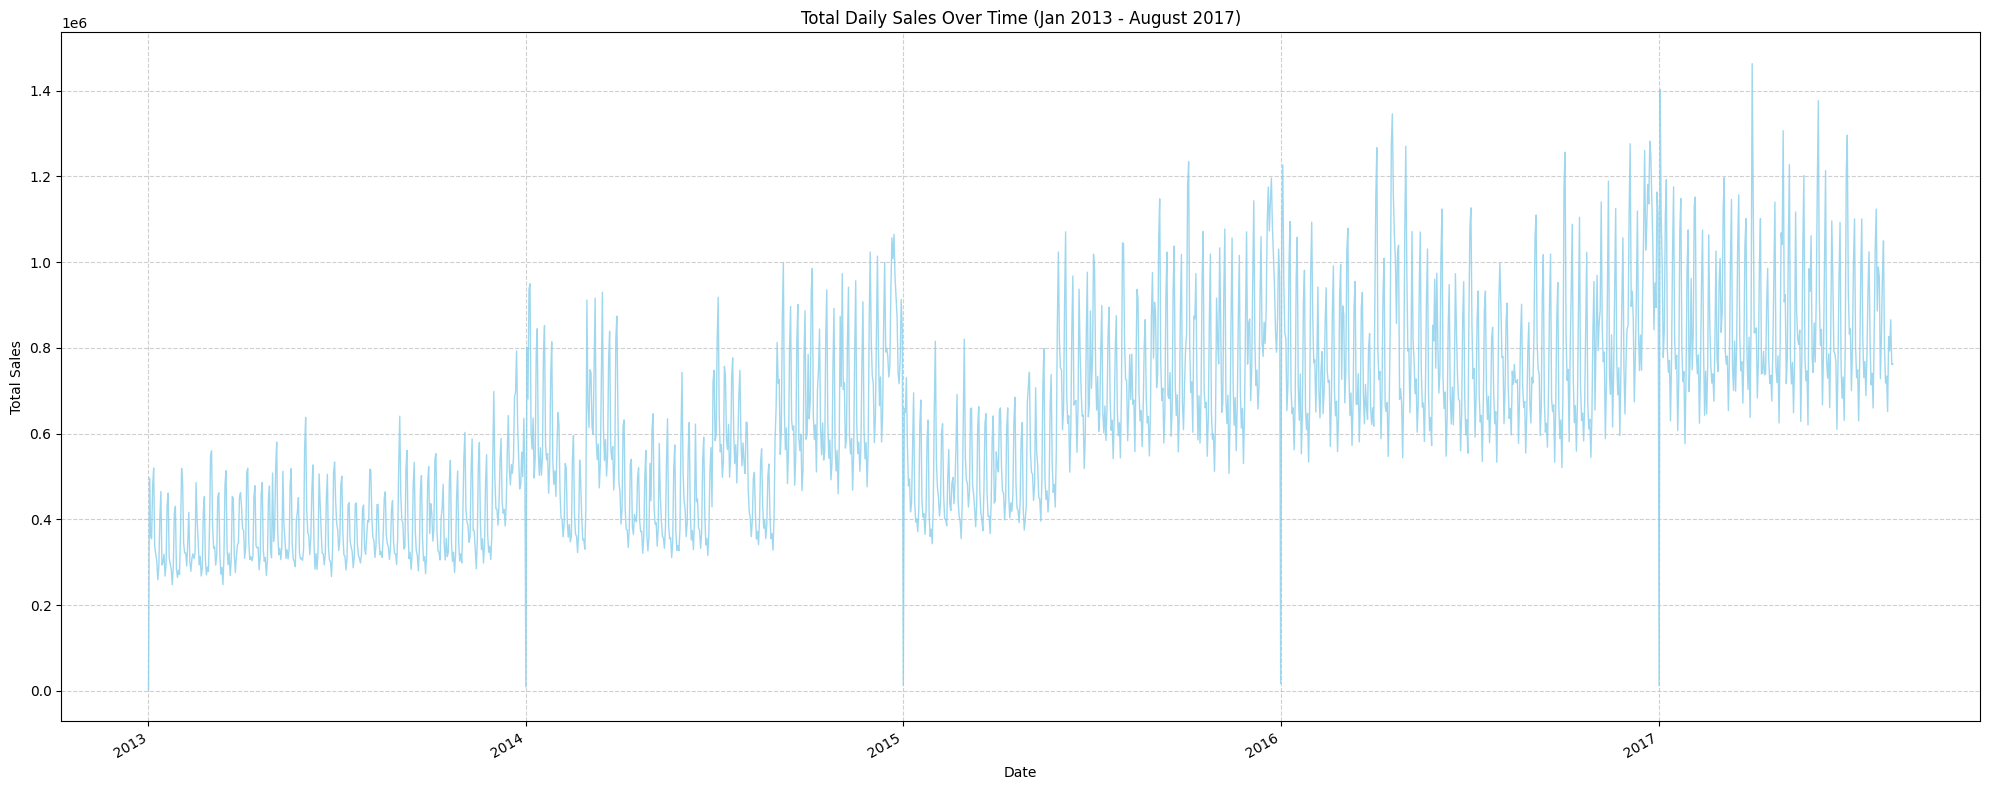

In [19]:
#plot between day vs sales

""" 
this helps to analyze if the sales are increasing or decreasing over time,
Before that we need to make sure that the date column is in date and time format
this is crucial for time series types, so let's convert the date column into date and time
""" 
df_train['date'] = pd.to_datetime(df_train['date'])

#sort data for correct line plot rendering
df_train = df_train.sort_values(by = 'date')

#Aggriating total no of sales across all stores and families
#By doing this we are creating a series with index as the date and values are the total sales for that day
daily_total_sales = df_train.groupby('date')['sales'].sum()

plt.figure(figsize=(20, 8))
daily_total_sales.plot(kind = 'line', color = 'skyblue', linewidth = 1, alpha = 0.8)
plt.title('Total Daily Sales Over Time (Jan 2013 - August 2017)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Stores Data Analysis

In [20]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [21]:
df_stores.shape

(54, 5)

In [22]:
unique_cites = df_stores['city'].unique()
unique_states = df_stores['state'].unique()
unique_types = df_stores['type'].unique()
unique_clusters = df_stores['cluster'].unique()

print (unique_cites)
print (unique_states)
print (unique_types)
print (unique_clusters)

['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']
['D' 'B' 'C' 'E' 'A']
[13  8  9  4  6 15  7  3 12 16  1 10  2  5 11 14 17]


In [23]:
no_of_unique_cites = df_stores['city'].nunique()
no_of_unique_states = df_stores['state'].nunique()
no_of_unique_types = df_stores['type'].nunique()
no_of_unique_clusters = df_stores['cluster'].nunique()

print (no_of_unique_cites)
print (no_of_unique_states)
print (no_of_unique_types)
print (no_of_unique_clusters)

22
16
5
17


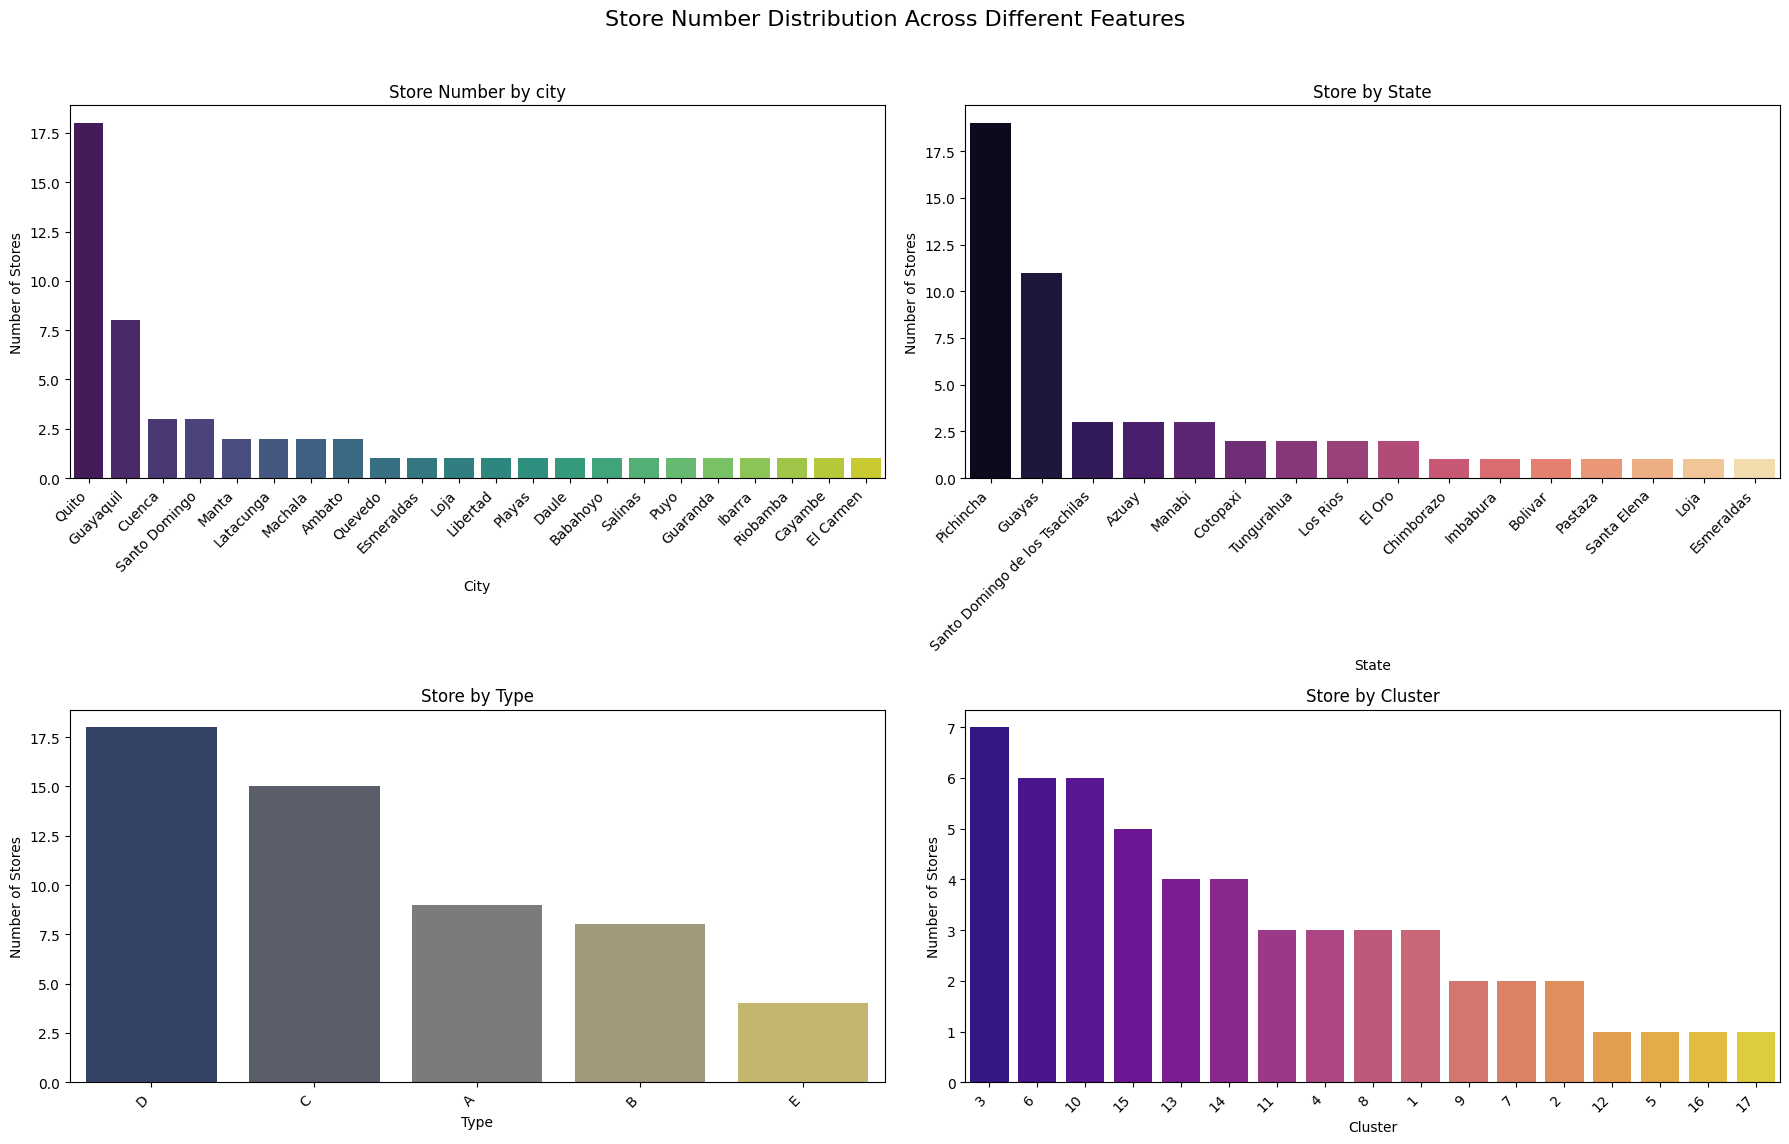

In [24]:
# 4 sub plots of stores vs city, state, type and cluster to understand the relation
#2x2 grid
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
fig.suptitle('Store Number Distribution Across Different Features', fontsize = 16)

#plot 1 - store number vs city
sns.countplot(ax = axes[0,0], x = 'city', data = df_stores, palette = 'viridis', order = df_stores['city'].value_counts().index)
axes[0,0].set_title('Store Number by city')
axes[0,0].set_xlabel('City')
axes[0,0].set_ylabel('Number of Stores')
axes[0,0].tick_params(axis = 'x', labelrotation = 45)
for label in axes[0, 0].get_xticklabels():
    label.set_ha('right')

#plot 2 - store number vs state
sns.countplot(ax = axes[0,1], x = 'state', data = df_stores, palette = 'magma', order = df_stores['state'].value_counts().index)
axes[0,1].set_title('Store by State')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Number of Stores')
axes[0,1].tick_params(axis = 'x', labelrotation = 45)
for label in axes[0, 1].get_xticklabels():
    label.set_ha('right')

#plot 3 - store number vs type
sns.countplot(ax = axes[1,0], x = 'type', data = df_stores, palette = 'cividis', order = df_stores['type'].value_counts().index)
axes[1,0].set_title('Store by Type')
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Number of Stores')
axes[1,0].tick_params(axis = 'x', labelrotation = 45)
for label in axes[1, 0].get_xticklabels():
    label.set_ha('right')

#plot 4 - store number vs cluster
sns.countplot(ax = axes[1,1], x = 'cluster', data = df_stores, palette = 'plasma', order = df_stores['cluster'].value_counts().index)
axes[1,1].set_title('Store by Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Stores')
axes[1,1].tick_params(axis = 'x', labelrotation = 45)
for label in axes[1, 1].get_xticklabels():
    label.set_ha('right')

plt.tight_layout(rect = [0, 0.03, 1, 0.96])
plt.show()

In [25]:
#look for the store 44 to 49
df_stores[df_stores['store_nbr'].between(40,54)]

,store_nbr,city,state,type,cluster
39,40,Machala,El Oro,C,3
40,41,Machala,El Oro,D,4
41,42,Cuenca,Azuay,D,2
42,43,Esmeraldas,Esmeraldas,E,10
43,44,Quito,Pichincha,A,5
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11


In [26]:
#look for the store 20 to 25
df_stores[df_stores['store_nbr'].between(20,25)]

,store_nbr,city,state,type,cluster
19,20,Quito,Pichincha,B,6
20,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
21,22,Puyo,Pastaza,C,7
22,23,Ambato,Tungurahua,D,9
23,24,Guayaquil,Guayas,D,1
24,25,Salinas,Santa Elena,D,1


In [27]:
df_stores[df_stores['store_nbr'].between(4,11)]

,store_nbr,city,state,type,cluster
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15
10,11,Cayambe,Pichincha,B,6


In [28]:
df_stores[df_stores['store_nbr'].between(10,25)]

,store_nbr,city,state,type,cluster
9,10,Quito,Pichincha,C,15
10,11,Cayambe,Pichincha,B,6
11,12,Latacunga,Cotopaxi,C,15
12,13,Latacunga,Cotopaxi,C,15
13,14,Riobamba,Chimborazo,C,7
14,15,Ibarra,Imbabura,C,15
15,16,Santo Domingo,Santo Domingo de los Tsachilas,C,3
16,17,Quito,Pichincha,C,12
17,18,Quito,Pichincha,B,16
18,19,Guaranda,Bolivar,C,15


In [29]:
df_stores[df_stores['store_nbr'].between(33,45)]

,store_nbr,city,state,type,cluster
32,33,Quevedo,Los Rios,C,3
33,34,Guayaquil,Guayas,B,6
34,35,Playas,Guayas,C,3
35,36,Libertad,Guayas,E,10
36,37,Cuenca,Azuay,D,2
37,38,Loja,Loja,D,4
38,39,Cuenca,Azuay,B,6
39,40,Machala,El Oro,C,3
40,41,Machala,El Oro,D,4
41,42,Cuenca,Azuay,D,2


In [30]:
#holidays data nalaysis with respect to sales
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [31]:
df_holidays_events.shape

(350, 6)

In [32]:
holidays_type = df_holidays_events['type'].unique()
holidays_locale = df_holidays_events['locale'].unique()
holidays_locale_name = df_holidays_events['locale_name'].unique()
holidays_description = df_holidays_events['description'].unique()
holidays_transferred = df_holidays_events['transferred'].unique()

print(holidays_type)
print(holidays_locale)
print(holidays_locale_name)
print(holidays_description)
print(holidays_transferred)

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Local' 'Regional' 'National']
['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']
['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Traslado Independencia de Guayaquil'
 'Dia de Difuntos' 'Independencia de Cuen

In [33]:
no_of_holidays_locale_name = df_holidays_events['locale_name'].nunique()
no_of_holidays_description = df_holidays_events['description'].nunique()

print(no_of_holidays_locale_name)
print(no_of_holidays_description)

24
103


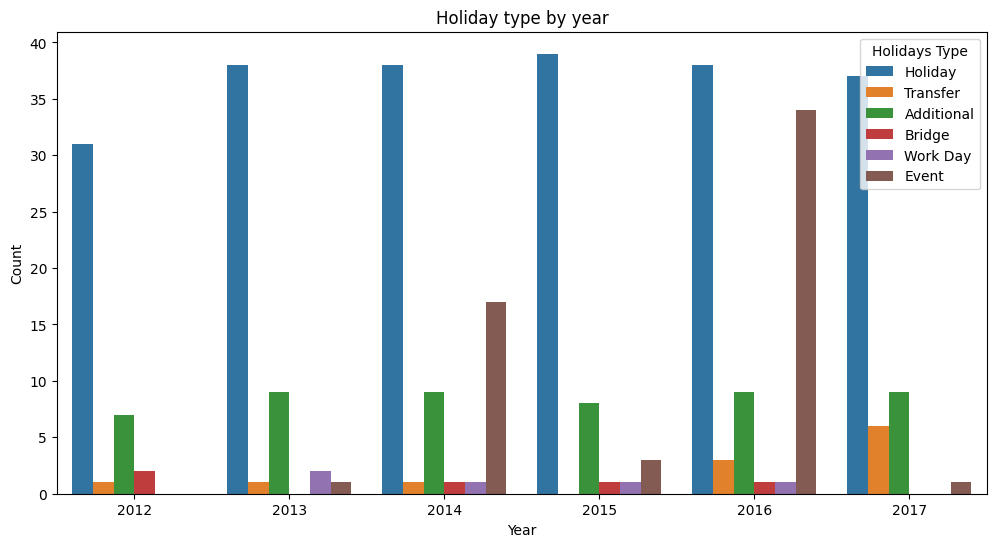

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#converting date column into datetime format
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])

#extracting features from the date
df_holidays_events['year'] = df_holidays_events['date'].dt.year
df_holidays_events['month'] = df_holidays_events['date'].dt.month
df_holidays_events['day'] = df_holidays_events['date'].dt.day
df_holidays_events['day_of_week'] = df_holidays_events['date'].dt.day_name()

#1. count of holidays types over time
plt.figure(figsize = (12, 6))
sns.countplot(x = 'year', hue = 'type', data = df_holidays_events)
plt.title('Holiday type by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Holidays Type')
plt.tight_layout
plt.show()

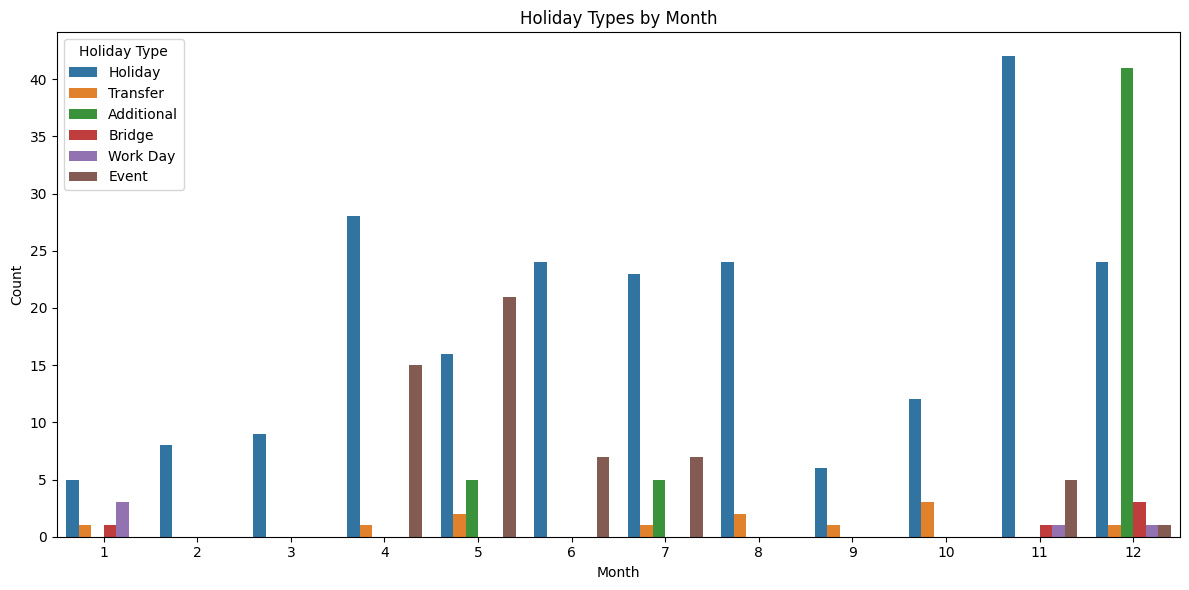

In [38]:
#count of holiday types by month
plt.figure(figsize=(12,6))
sns.countplot(x = 'month', hue = 'type', data = df_holidays_events)
plt.title('Holiday Types by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title = 'Holiday Type')
plt.tight_layout()
plt.show()

In [39]:
df_oil.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [41]:
missing_values_oil = df_oil.isnull().sum()
missing_values_oil

date           0
dcoilwtico    43
dtype: int64

In [42]:
df_oil.shape

(1218, 2)

In [54]:
df_oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(df_oil['dcoilwtico'].mean())
df_oil.head()

,date,dcoilwtico
0,2013-01-01,67.714366
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-07,93.200000


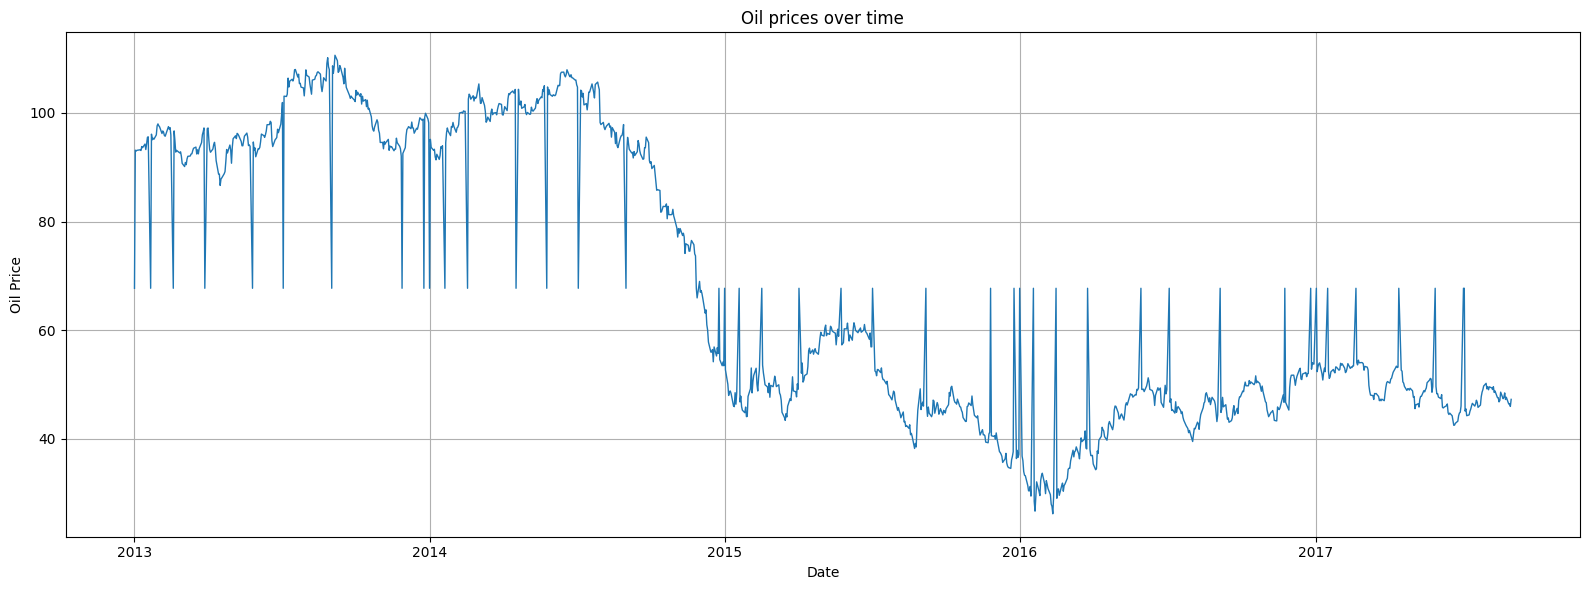

In [55]:
#plot between date and dcoilwtico
df_oil['date'] = pd.to_datetime(df_oil['date'])

#extract year for grouping
df_oil['year'] = df_oil['date'].dt.year

#plotting
plt.figure(figsize = (16,6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], linewidth = 1)
plt.title('Oil prices over time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(True)
plt.tight_layout()
plt.show()